In [4]:
import pandas as pd
import numpy as np
import datetime

sport = pd.read_excel('data_files/Days.xlsx',sheet_name='health')

In [5]:
sport.columns

Index(['WEEK_DAY', 'DATE', 'DEND', 'DSTART', 'REGIME', 'SLEEP',
       'VISUALIZATION', 'MEDITAITON', 'BREATH', 'CTRAINING', 'MORNING',
       'SPORT', 'SPORT_TIME', 'PL1', 'PL2', 'OUTSIDE', 'EYES', 'QL', 'QO',
       'PNW', 'PUSH_UPS', 'PULL_UPS', 'SKID', 'SQUATING', 'ABS', 'PLANK',
       'WATER', 'RUN', 'CYCLE', 'GOALS', 'DUMBBELLS', 'ALCOTIME', 'BEER',
       'WINE', 'COCTAIL', 'VODKA', 'WHISKY', 'BRANDY', 'FASTFOOD', 'SWEETS',
       'WALK', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45'],
      dtype='object')

In [6]:
sport = sport.loc[:,['DATE', 'RUN', 'CYCLE','WALK']]
sport = sport.dropna()

In [7]:
mask1 = sport['RUN'] != 0
mask2 = sport['WALK'] != 0
mask3 = sport['CYCLE'] != 0
final = sport[mask1 & mask2 & mask3]
final

,DATE,RUN,CYCLE,WALK
3643,2018-12-23,3.00,13.00,5.00
3867,2019-08-04,3.00,6.00,6.00
3874,2019-08-11,4.75,13.00,9.00
3964,2019-11-09,4.00,29.00,7.00
4174,2020-06-06,4.90,15.00,3.50
...,...,...,...,...
5141,2023-01-29,3.37,9.95,3.00
5147,2023-02-04,2.34,3.22,7.00
5154,2023-02-11,3.39,9.86,3.13
5155,2023-02-12,7.00,6.33,1.00


In [8]:
writer = pd.ExcelWriter(f'data_files/distance.xlsx', engine='xlsxwriter')
final.to_excel(writer, sheet_name = 'final')
writer.save()

In [9]:
days = pd.read_excel('data_files/Days.xlsx',sheet_name='days')
days = days.loc[:,['Type','DATE','SPHERE']].dropna()
days['Values'] = 1
temp = days.copy()

In [10]:
days_d = temp[temp['Type'] == 'D']
days_d['DATE'] = days_d['DATE'].astype('datetime64')
days_d['Year'] = days_d['DATE'].dt.year
days_d = days_d.loc[:,['Type','Year','DATE','SPHERE', 'Values']]

days_w = days[days['Type'] == 'W']
days_m = days[days['Type'] == 'M']

/var/folders/k0/5mz4jdsj64n5f2jltclyq9zh0000gn/T/ipykernel_14997/156351586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_d['DATE'] = days_d['DATE'].astype('datetime64')
/var/folders/k0/5mz4jdsj64n5f2jltclyq9zh0000gn/T/ipykernel_14997/156351586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_d['Year'] = days_d['DATE'].dt.year


In [18]:
ddd = days_d.groupby(by=['Year', 'SPHERE']).sum().reset_index()
www = days_w.groupby(by=['SPHERE']).sum().reset_index()
mmm = days_m.groupby(by=['SPHERE']).sum().reset_index()

In [33]:
d2023 = ddd[ddd['Year'] == 2023]
d2022 = ddd[ddd['Year'] == 2022]
d2021 = ddd[ddd['Year'] == 2021]

In [36]:
d2021 = d2021.sort_values(by='Values', ascending = False)
d2022 = d2022.sort_values(by='Values', ascending = False)
d2023 = d2023.sort_values(by='Values', ascending = False)

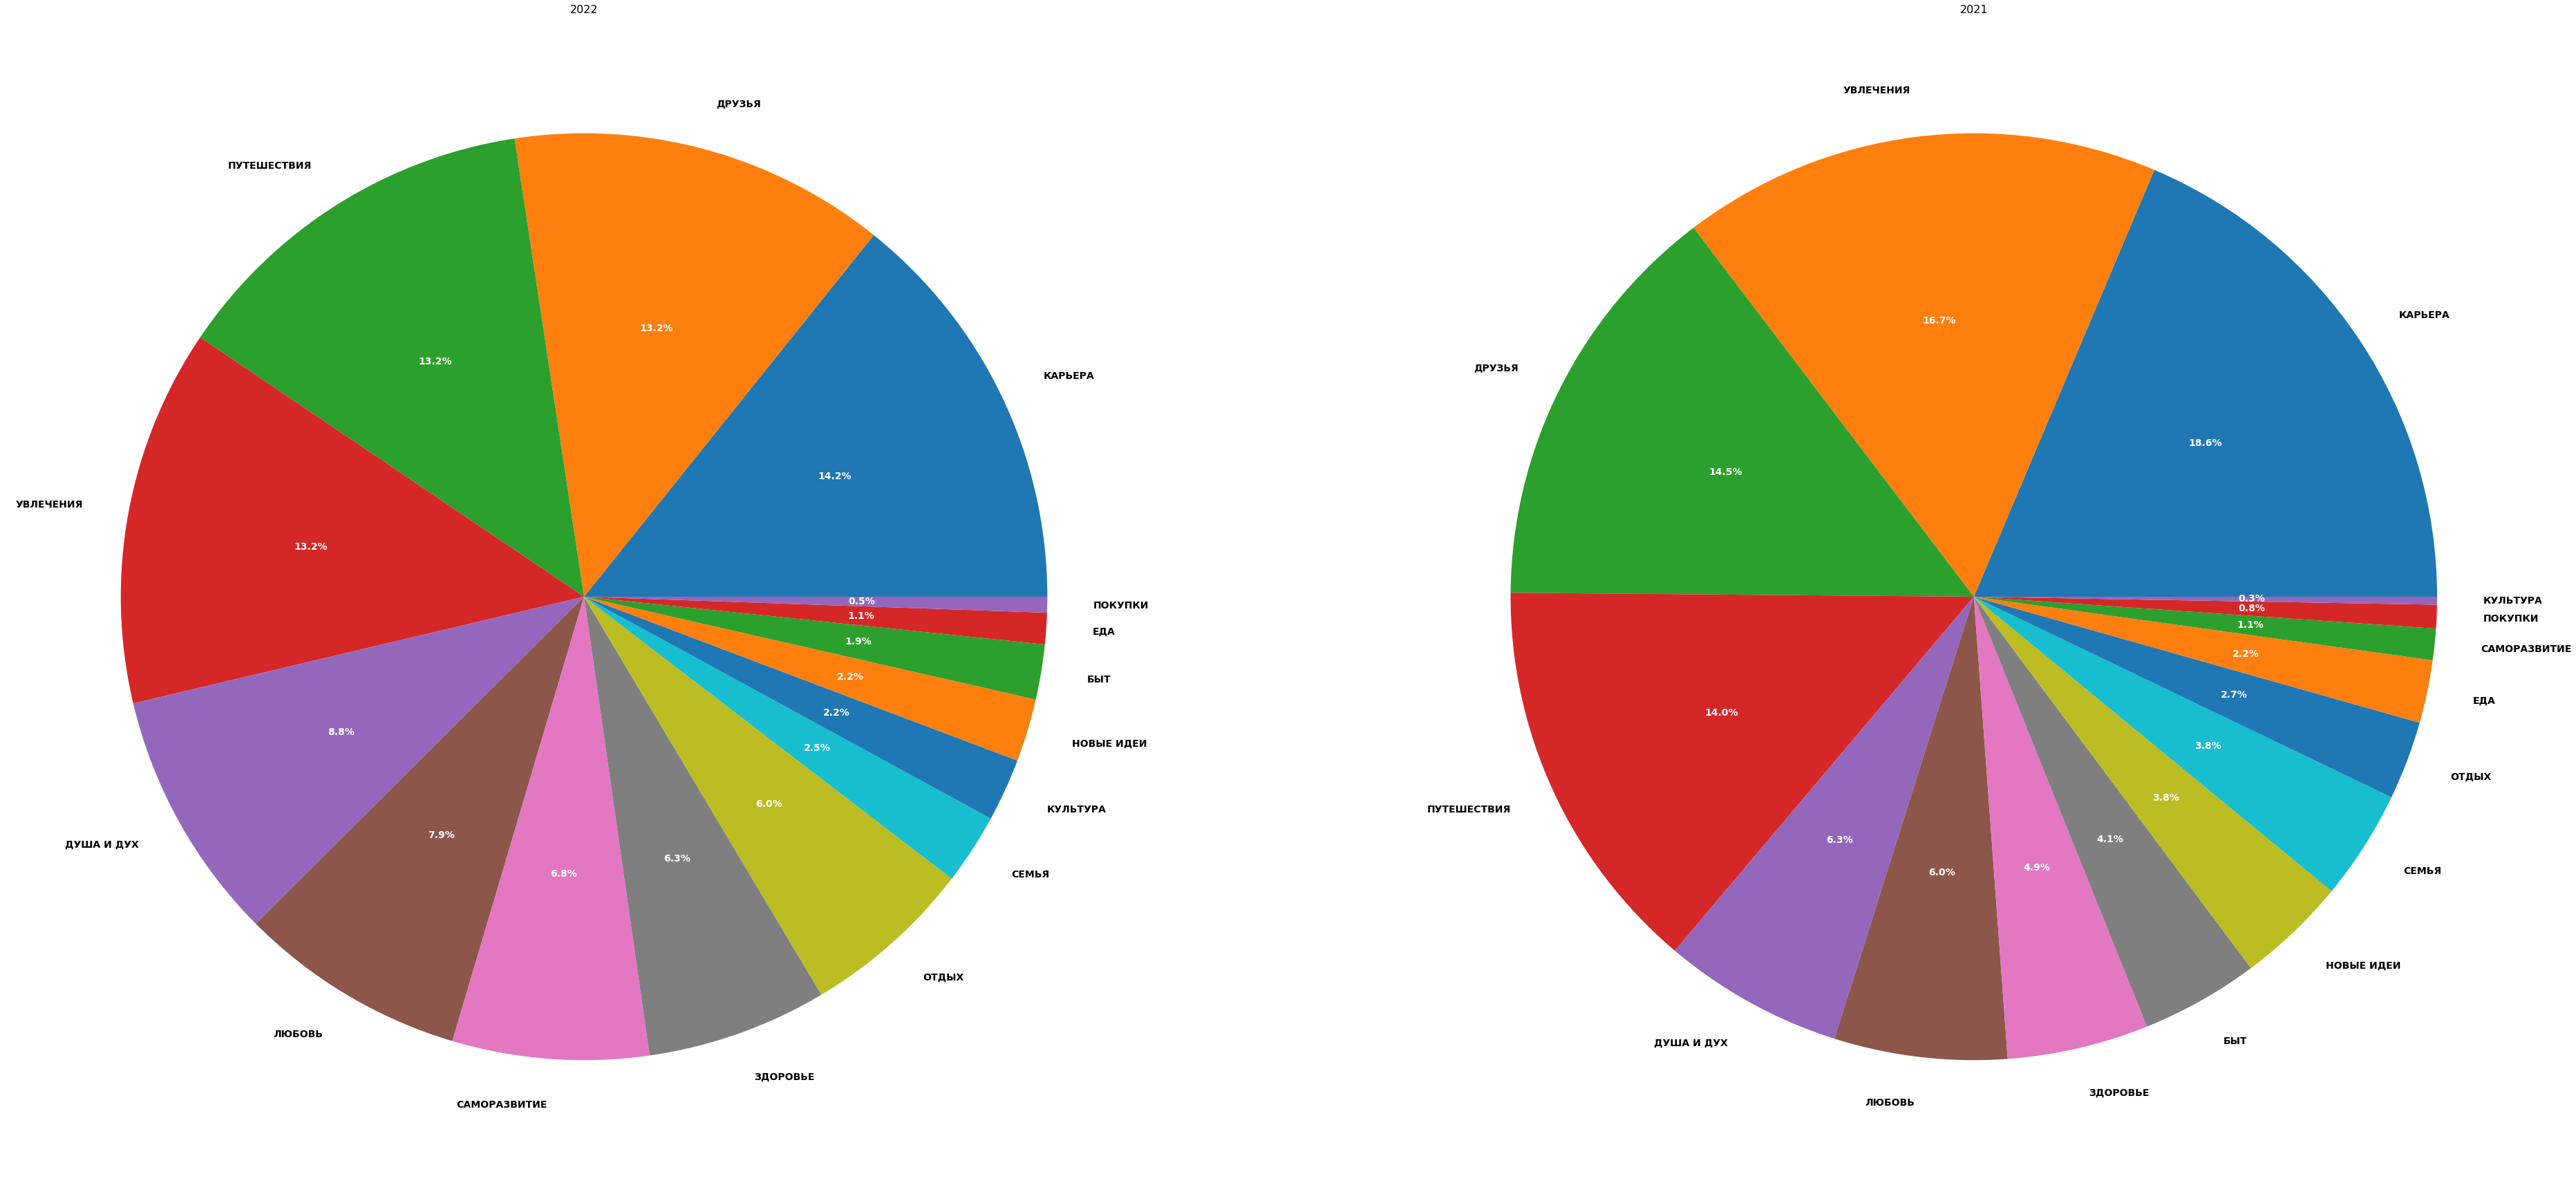

In [30]:
import matplotlib.pyplot as plt

# Define the labels and sizes for the pie chart
labels = d2022.SPHERE.to_list()
sizes = d2022.Values.to_list()

# Calculate the percentage of each slice
total = sum(sizes)
percentages = [(size/total)*100 for size in sizes]


# Define the labels and sizes for the pie chart
labels21 = d2021.SPHERE.to_list()
sizes21 = d2021.Values.to_list()


# Calculate the percentage of each slice
total21 = sum(sizes21)

percentages21 = [(s/total21)*100 for s in sizes21]



# Create the pie chart with labels on slices
fig, (ax, ax2) = plt.subplots(1,2,figsize=(64, 64))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'color': 'black','fontsize': 14, 'fontweight': 'bold'} )

# Set the font size for the percentage labels
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    
    
plt.subplots_adjust(left=0, bottom=0.1, right=0.8)


wedges2, texts2, autotexts2 = ax2.pie(sizes21, labels=labels21, autopct='%1.1f%%', textprops={'color': 'black','fontsize': 14, 'fontweight': 'bold'} )

# Set the font size for the percentage labels
for autotext in autotexts2:
    autotext.set_fontsize(14)
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    
    
plt.subplots_adjust(left=0, bottom=0.1, right=0.8)

# Set the titles for the subplots
ax.set_title('2022', fontsize=16)
ax2.set_title('2021', fontsize=16)


# Show the plot
plt.savefig('data_files/1.jpg', dpi=300, bbox_inches='tight')
plt.show()
# Save the plot


In [37]:
d2023

,Year,SPHERE,Values
196,2022,КАРЬЕРА,52
192,2022,ДРУЗЬЯ,48
202,2022,ПУТЕШЕСТВИЯ,48
205,2022,УВЛЕЧЕНИЯ,48
193,2022,ДУША И ДУХ,32
198,2022,ЛЮБОВЬ,29
203,2022,САМОРАЗВИТИЕ,25
195,2022,ЗДОРОВЬЕ,23
200,2022,ОТДЫХ,22
204,2022,СЕМЬЯ,9
